# Side by side comparison

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

ncct_dir = "../../data/gravo/NCCT/"
nccts = [f for f in os.listdir(ncct_dir) if f.endswith("nii") and "-" not in f]

['2503602.nii', '1534147.nii', '2623834.nii'] [2, 2, 0]


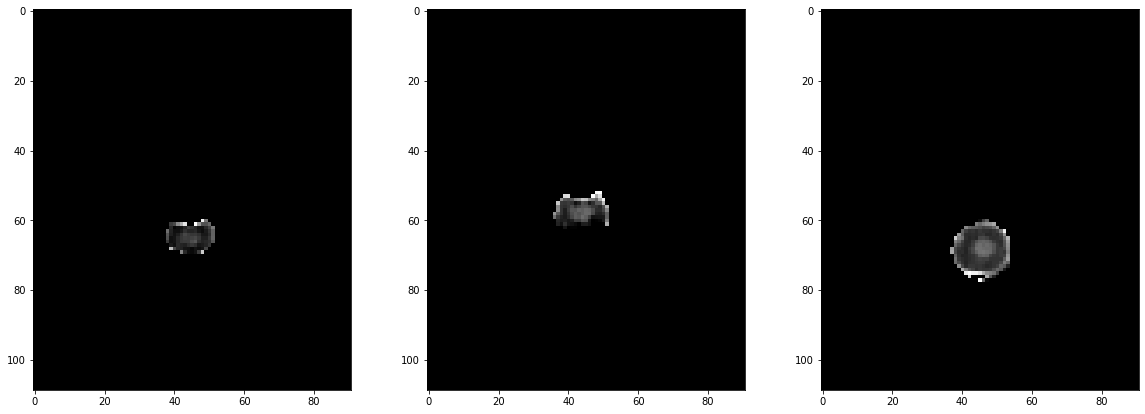


['2503602.nii', '1534147.nii', '2623834.nii'] [3, 3, 1]


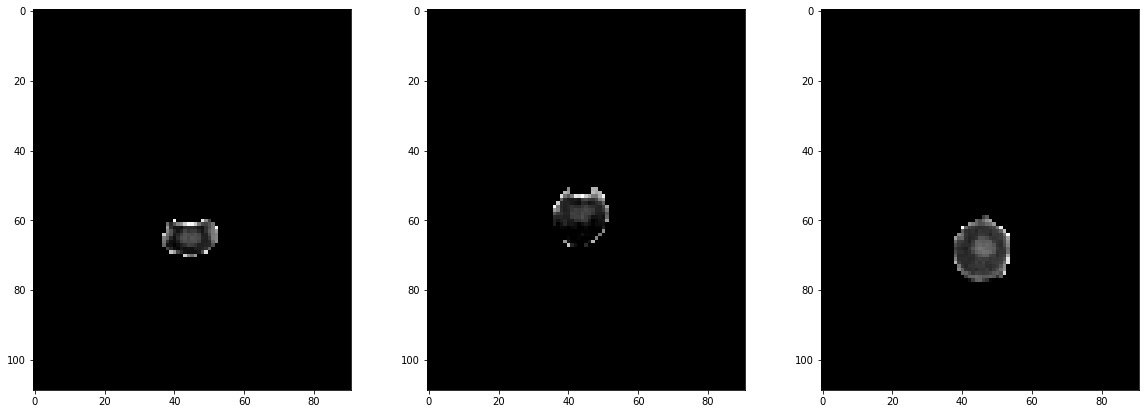


['2503602.nii', '1534147.nii', '2623834.nii'] [4, 4, 2]


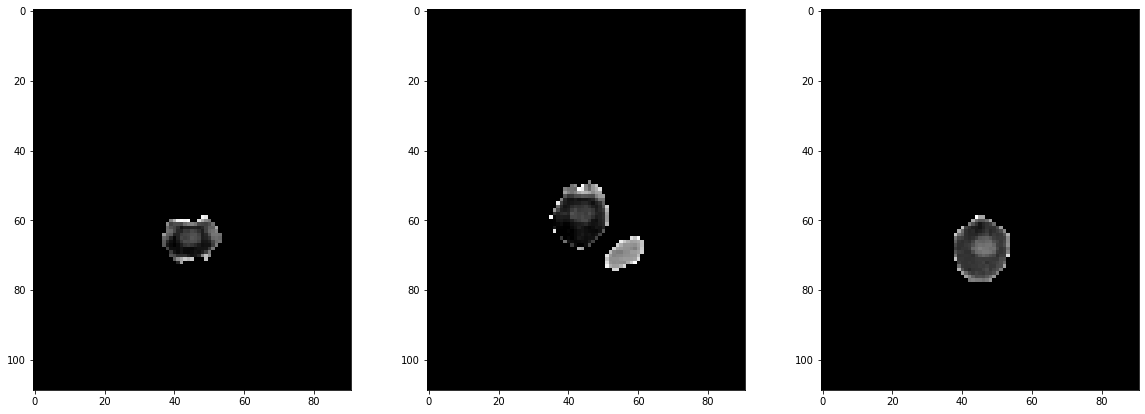


['2503602.nii', '1534147.nii', '2623834.nii'] [5, 5, 3]


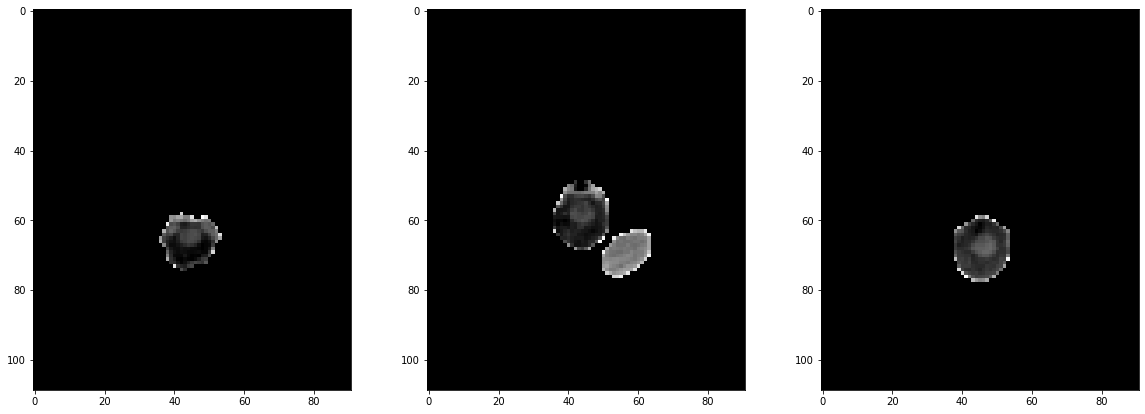


['2503602.nii', '1534147.nii', '2623834.nii'] [6, 6, 4]


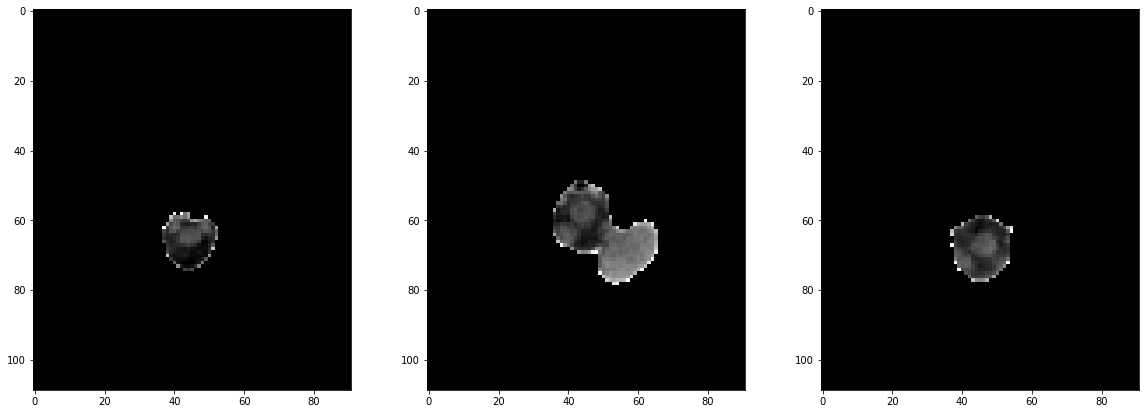


['2503602.nii', '1534147.nii', '2623834.nii'] [7, 7, 5]


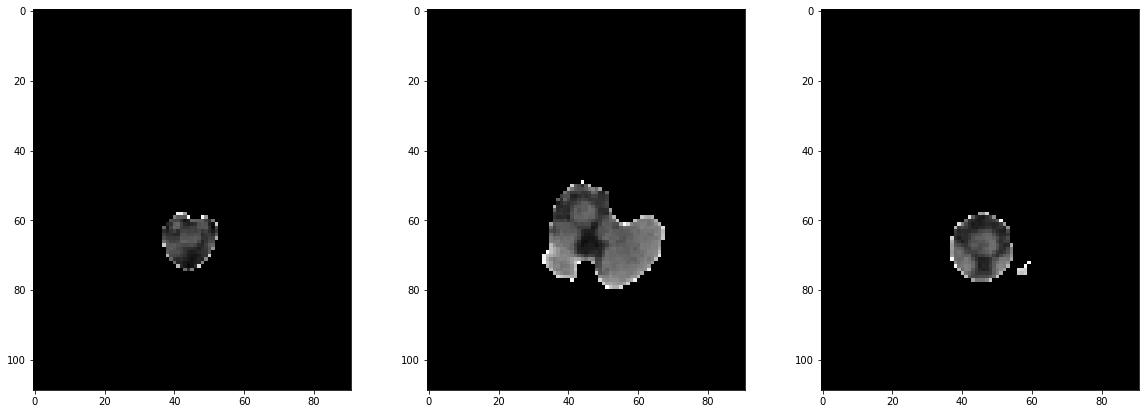


['2503602.nii', '1534147.nii', '2623834.nii'] [8, 8, 6]


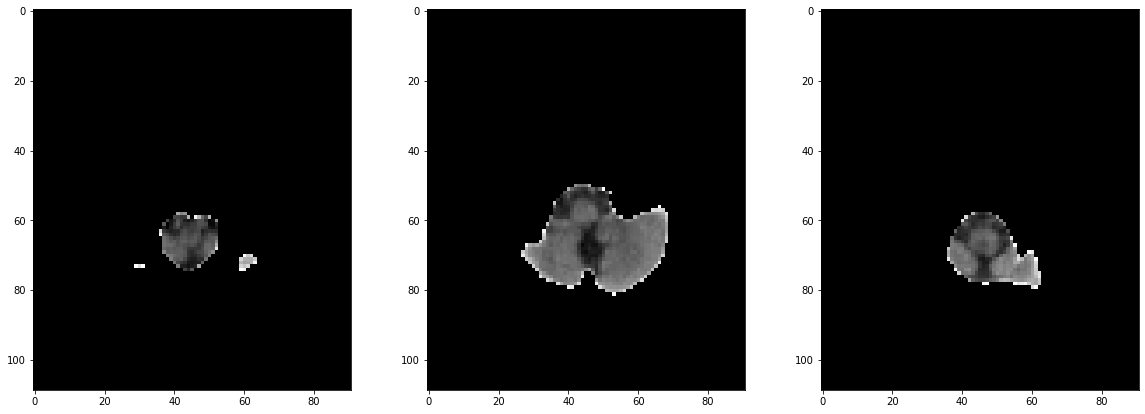


['2503602.nii', '1534147.nii', '2623834.nii'] [9, 9, 7]


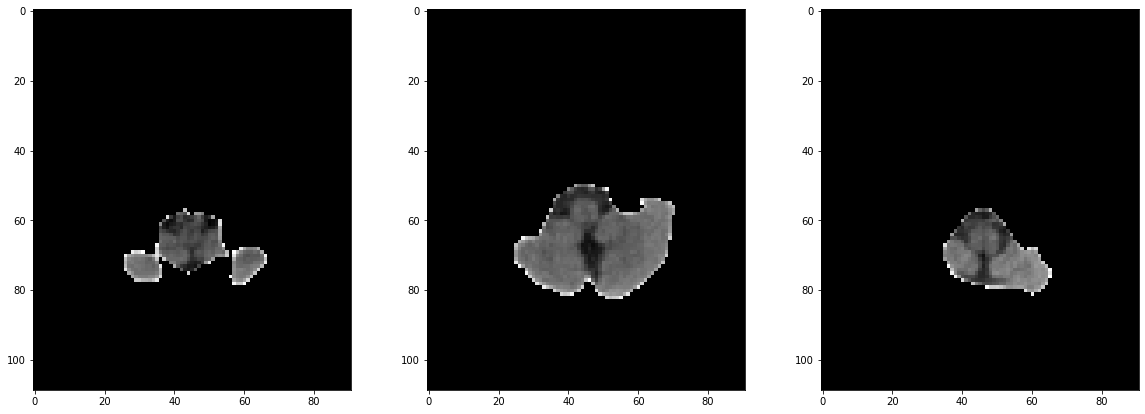


['2503602.nii', '1534147.nii', '2623834.nii'] [10, 10, 8]


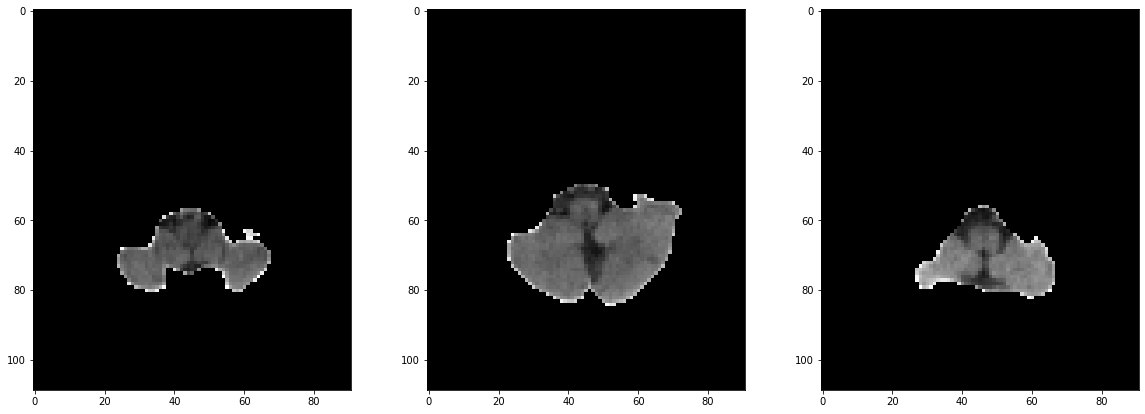


['2503602.nii', '1534147.nii', '2623834.nii'] [11, 11, 9]


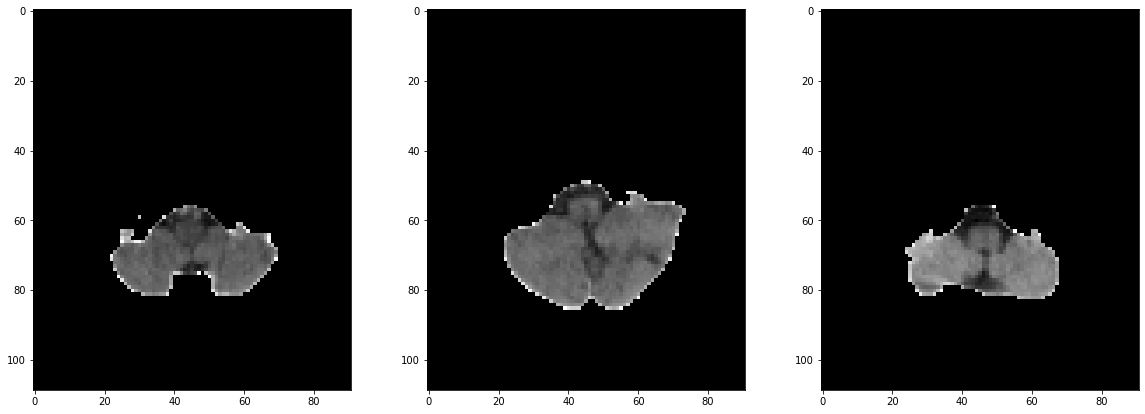


['2503602.nii', '1534147.nii', '2623834.nii'] [12, 12, 10]


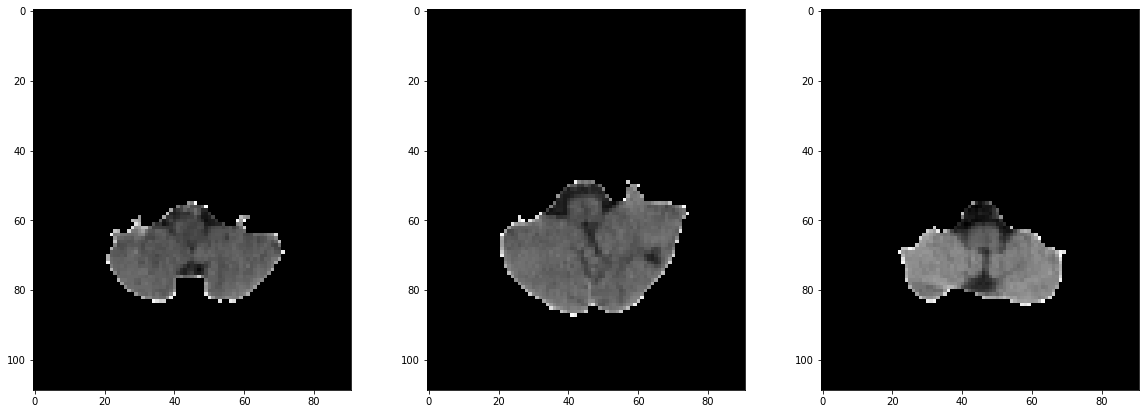


['2503602.nii', '1534147.nii', '2623834.nii'] [13, 13, 11]


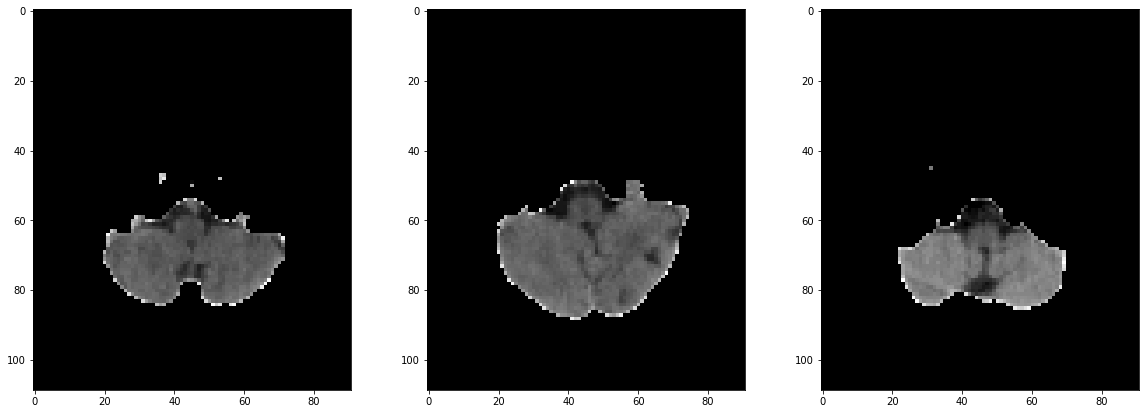


['2503602.nii', '1534147.nii', '2623834.nii'] [14, 14, 12]


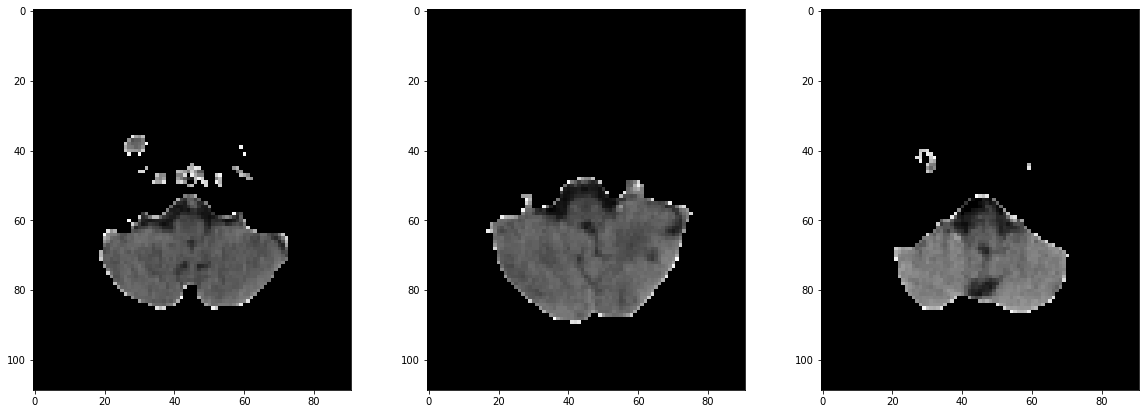


['2503602.nii', '1534147.nii', '2623834.nii'] [15, 15, 13]


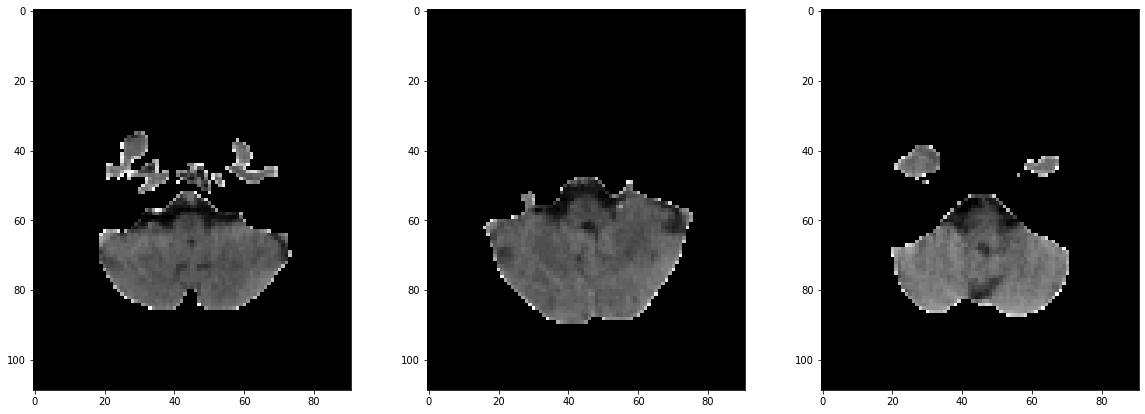


['2503602.nii', '1534147.nii', '2623834.nii'] [16, 16, 14]


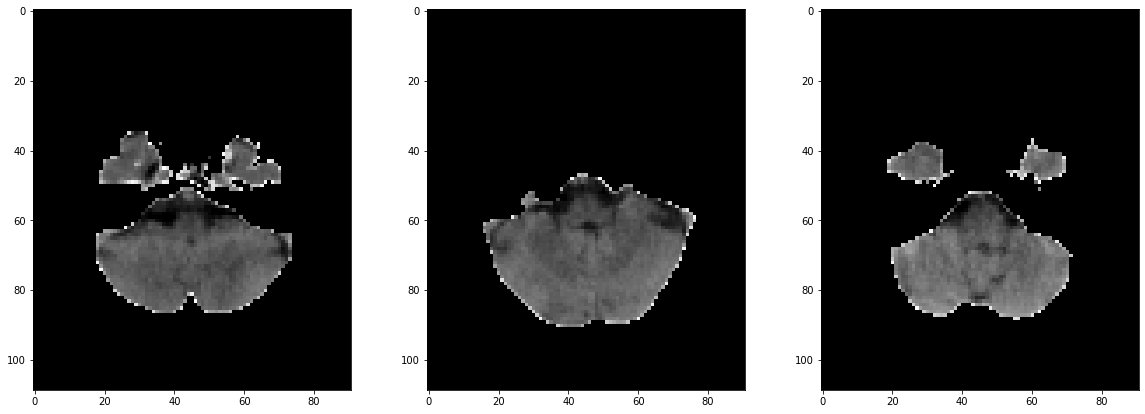


['2503602.nii', '1534147.nii', '2623834.nii'] [17, 17, 15]


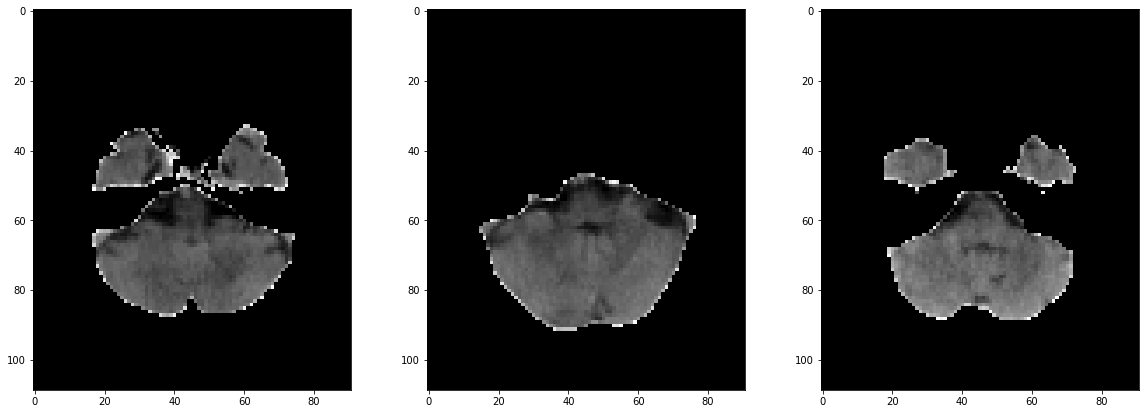


['2503602.nii', '1534147.nii', '2623834.nii'] [18, 18, 16]


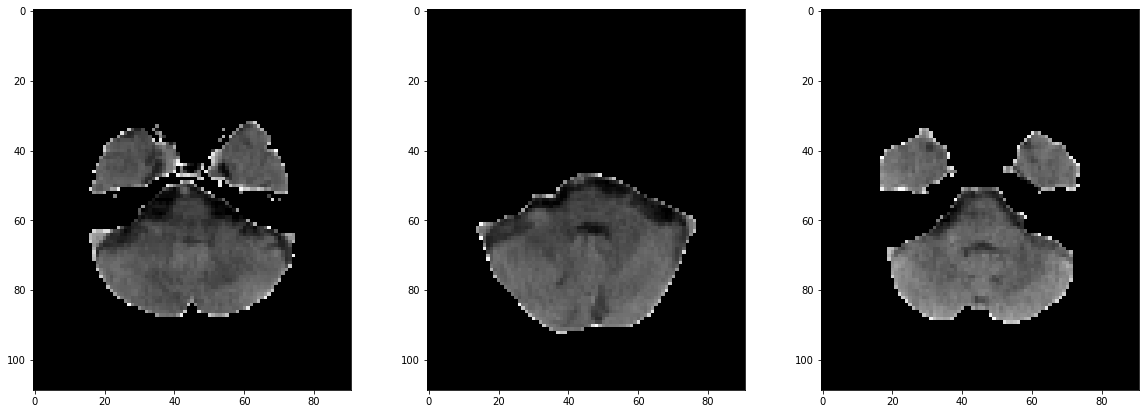


['2503602.nii', '1534147.nii', '2623834.nii'] [19, 19, 17]


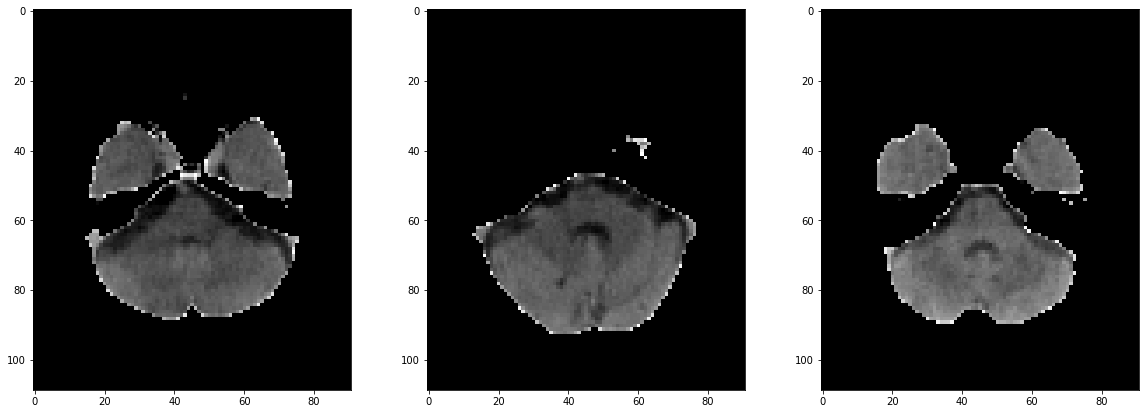


['2503602.nii', '1534147.nii', '2623834.nii'] [20, 20, 18]


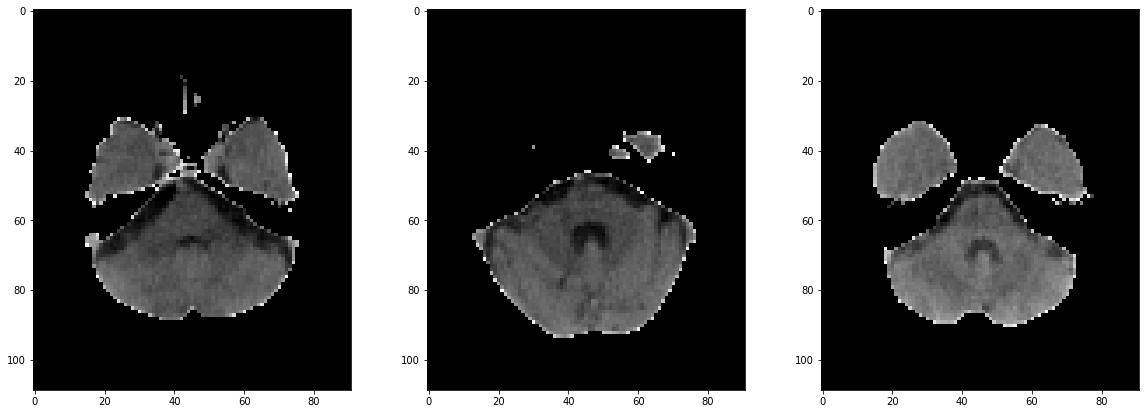


['2503602.nii', '1534147.nii', '2623834.nii'] [21, 21, 19]


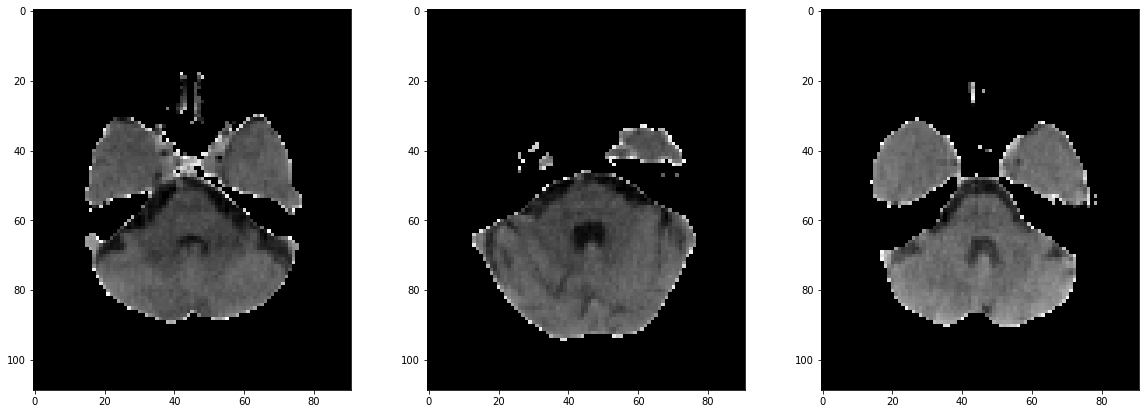


['2503602.nii', '1534147.nii', '2623834.nii'] [22, 22, 20]


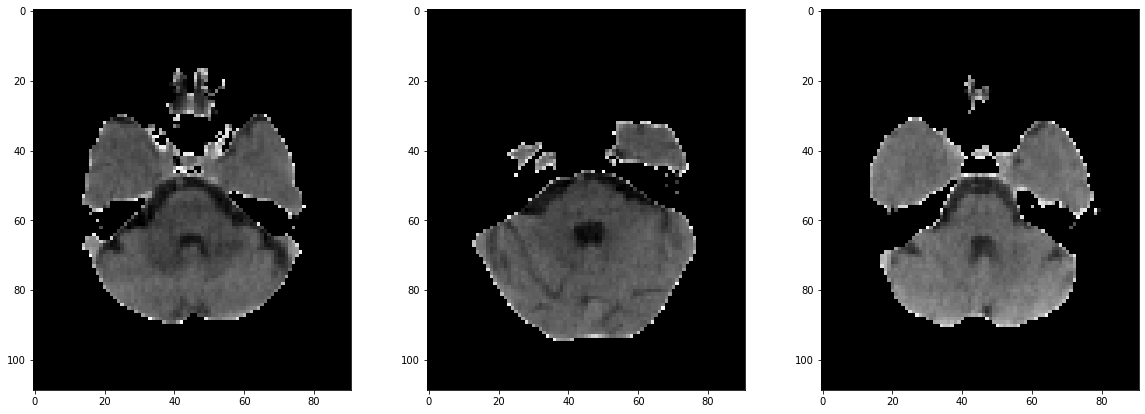


['2503602.nii', '1534147.nii', '2623834.nii'] [23, 23, 21]


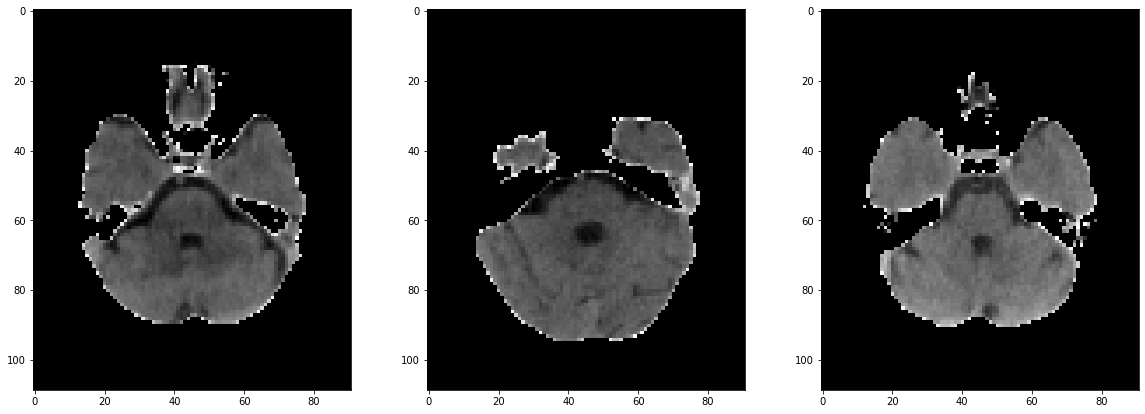


['2503602.nii', '1534147.nii', '2623834.nii'] [24, 24, 22]


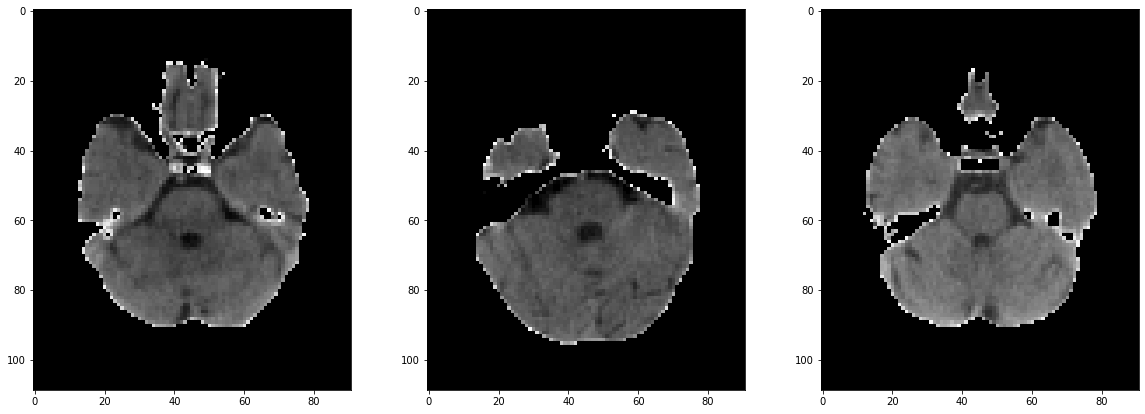


['2503602.nii', '1534147.nii', '2623834.nii'] [25, 25, 23]


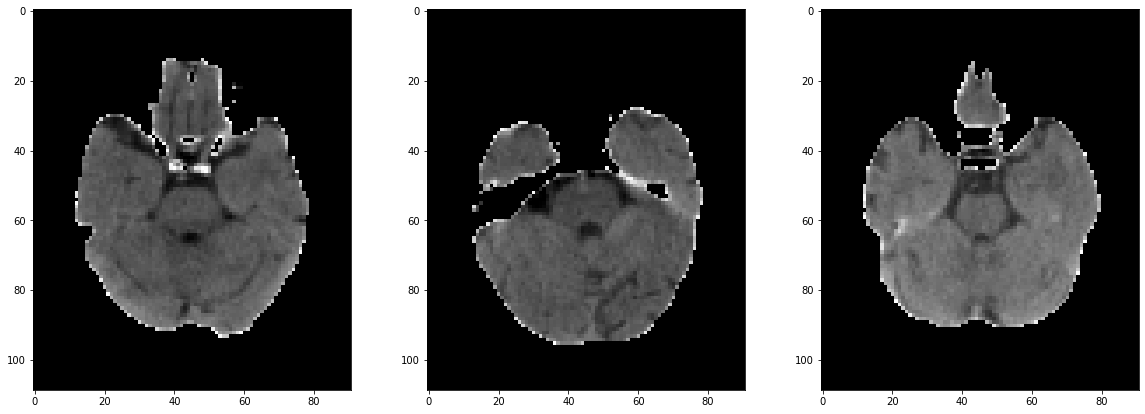


['2503602.nii', '1534147.nii', '2623834.nii'] [26, 26, 24]


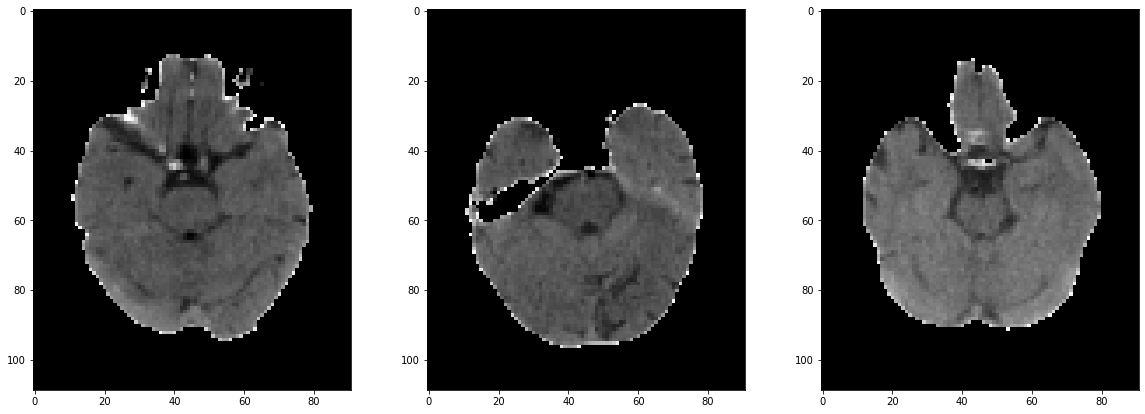


['2503602.nii', '1534147.nii', '2623834.nii'] [27, 27, 25]


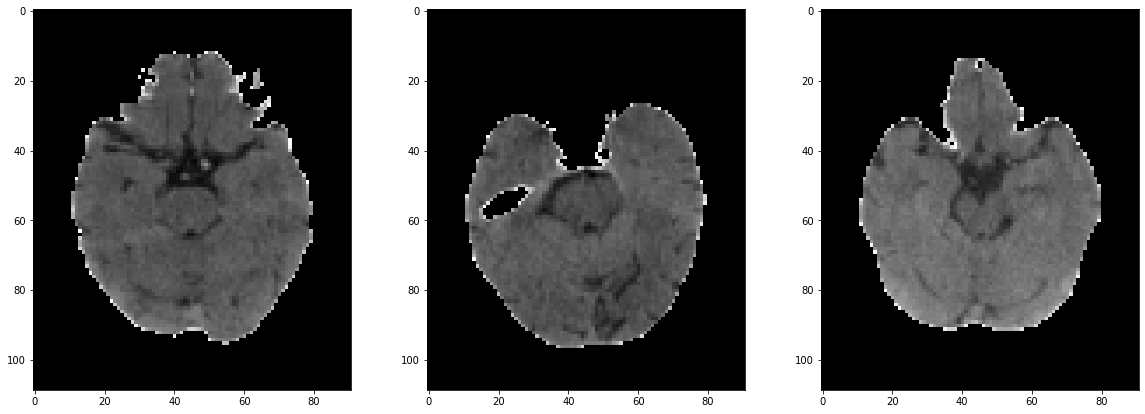


['2503602.nii', '1534147.nii', '2623834.nii'] [28, 28, 26]


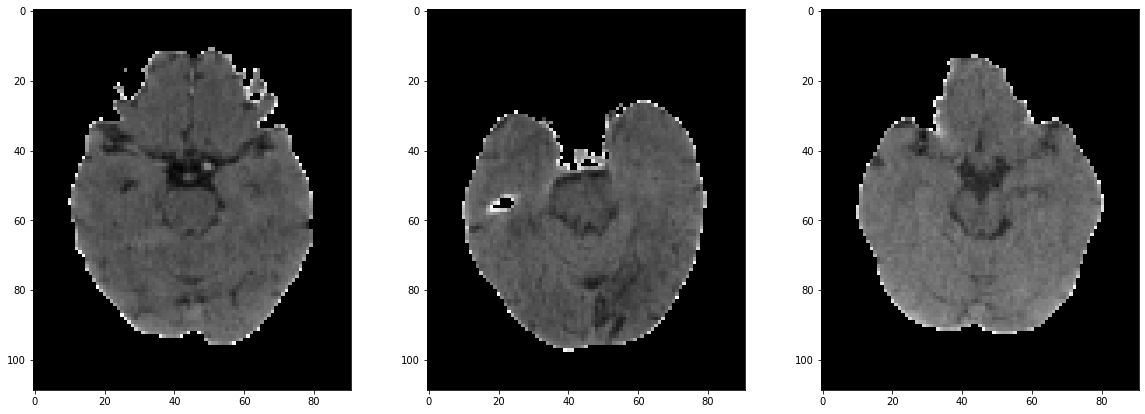


['2503602.nii', '1534147.nii', '2623834.nii'] [29, 29, 27]


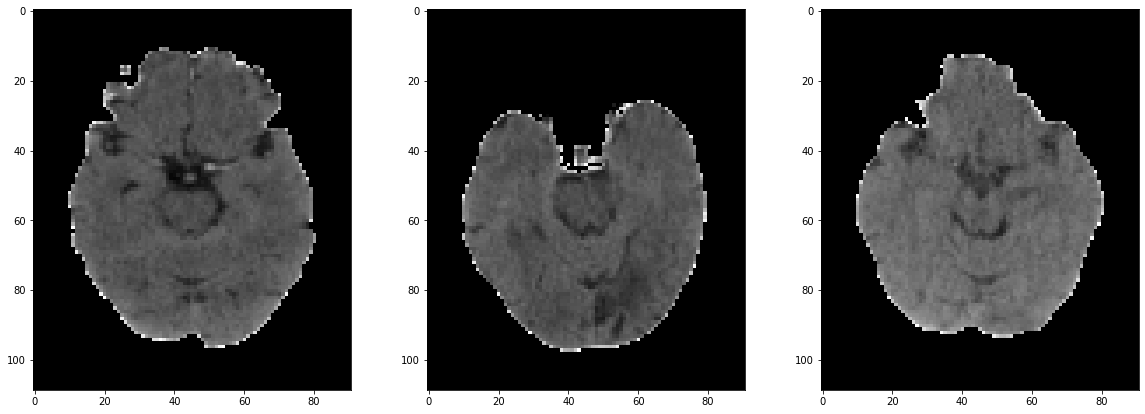


['2503602.nii', '1534147.nii', '2623834.nii'] [30, 30, 28]


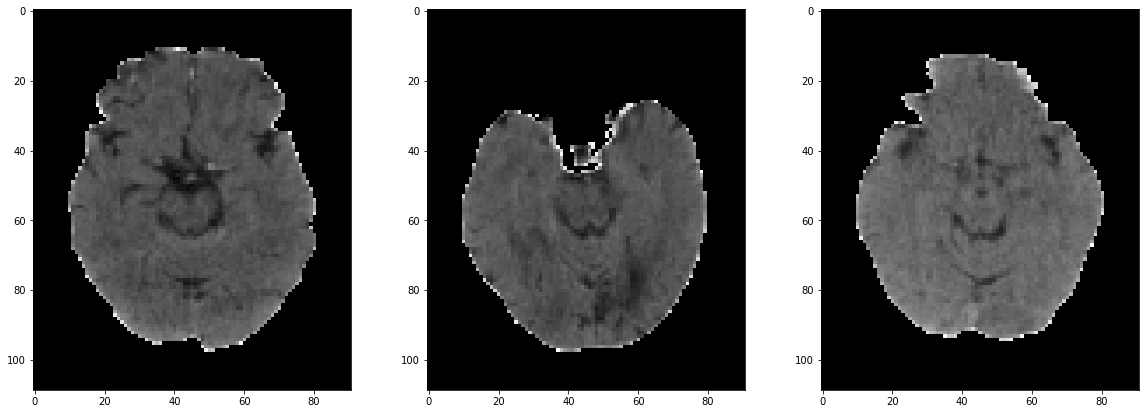


['2503602.nii', '1534147.nii', '2623834.nii'] [31, 31, 29]


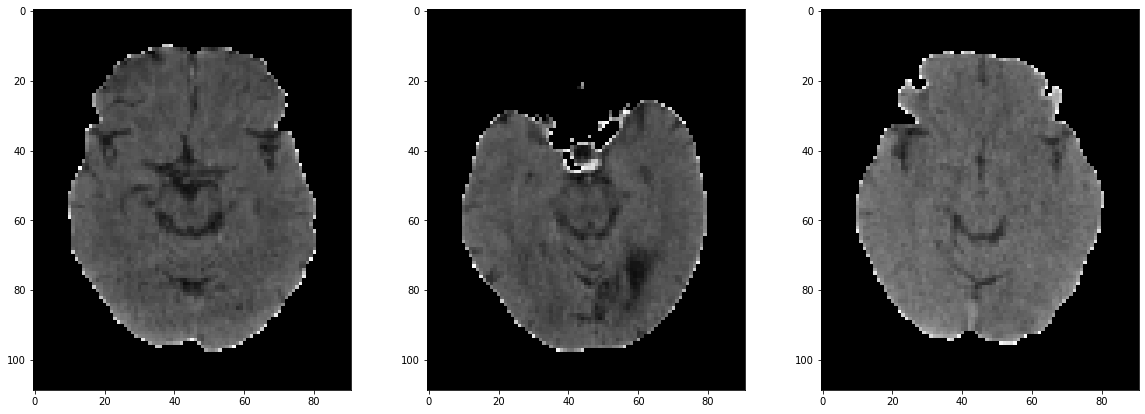


['2503602.nii', '1534147.nii', '2623834.nii'] [32, 32, 30]


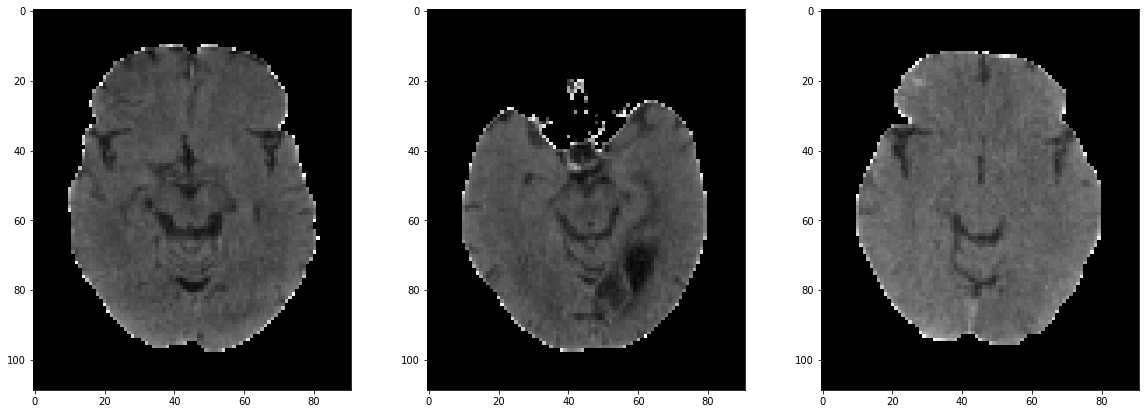


['2503602.nii', '1534147.nii', '2623834.nii'] [33, 33, 31]


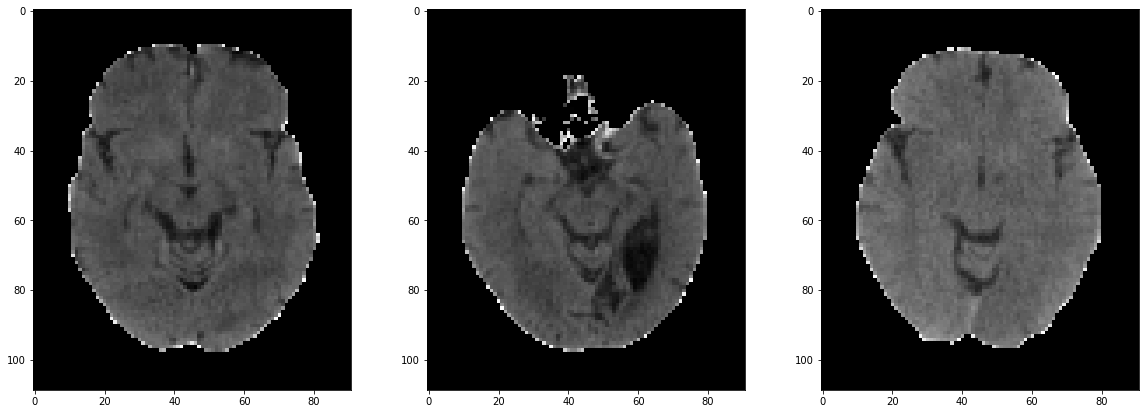


['2503602.nii', '1534147.nii', '2623834.nii'] [34, 34, 32]


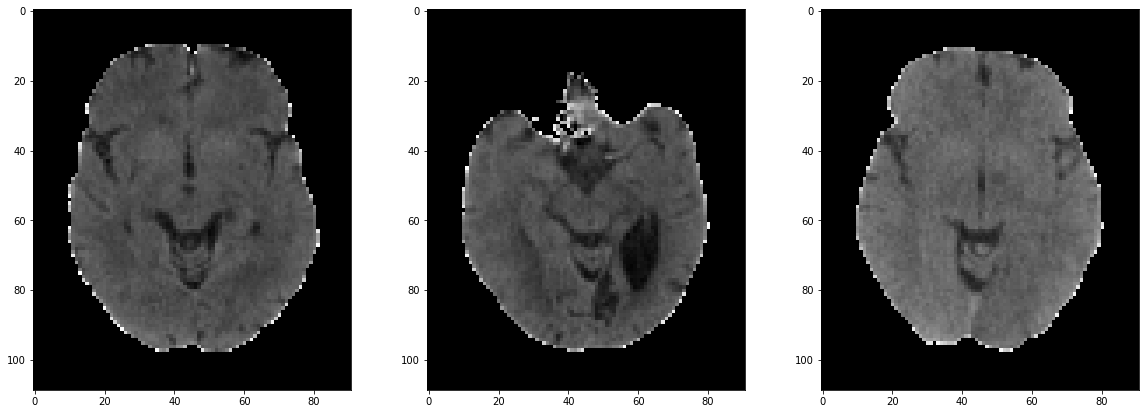


['2503602.nii', '1534147.nii', '2623834.nii'] [35, 35, 33]


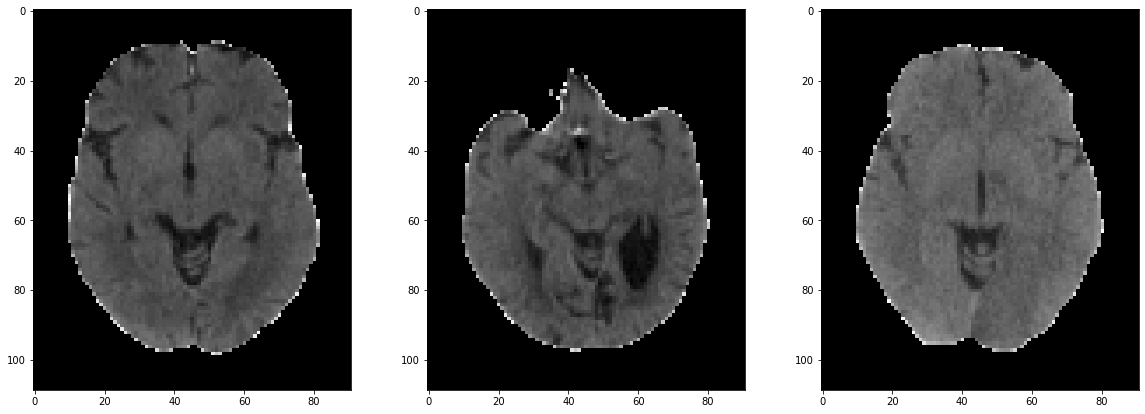


['2503602.nii', '1534147.nii', '2623834.nii'] [36, 36, 34]


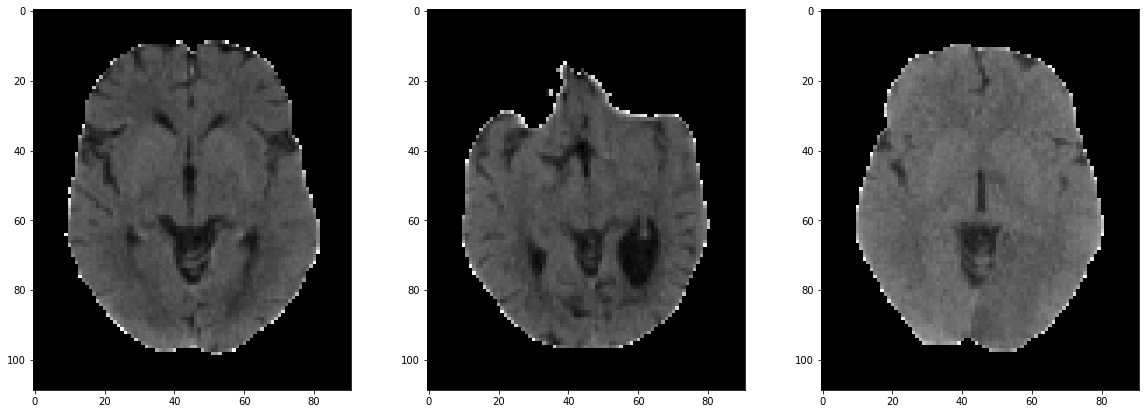


['2503602.nii', '1534147.nii', '2623834.nii'] [37, 37, 35]


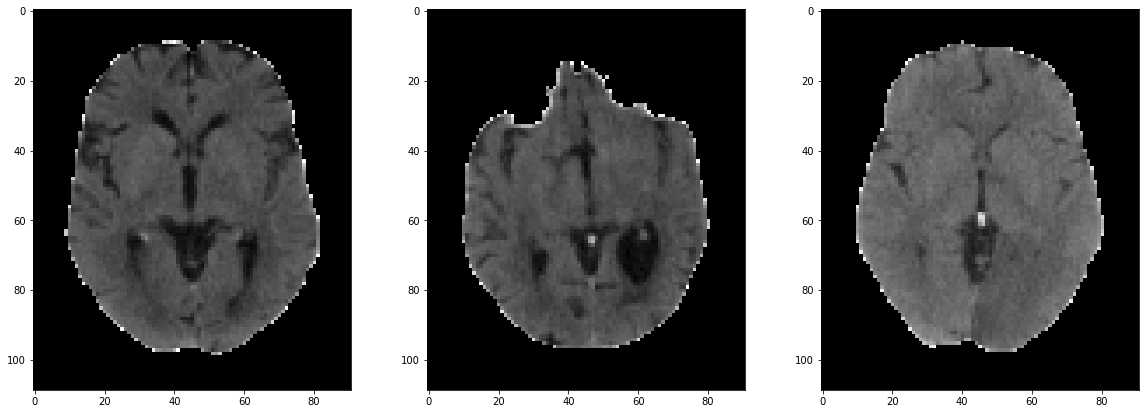


['2503602.nii', '1534147.nii', '2623834.nii'] [38, 38, 36]


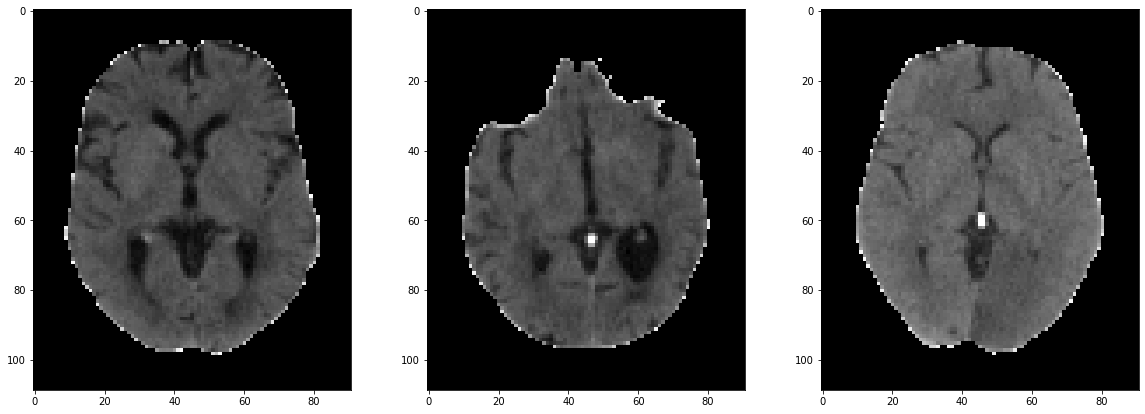

KeyboardInterrupt: Interrupted by user

In [18]:
N = 3
init_pos = [0 for i in range(N)]
sapo = [0 for i in range(N)]
np.random.shuffle(nccts)
while True:
    _, axs = plt.subplots(1, N, figsize = (20,7))
    for i in range(N):
        img = nib.load(ncct_dir+nccts[i]).get_fdata()
        if 0 in sapo:
            sapo[i] = 1
            while np.count_nonzero(img[:,:,init_pos[i]] > 0) < 100:
                init_pos[i] += 1
        else:
            init_pos[i] += 1
        img = img[:,:,init_pos[i]].T
        img = np.flip(img, 0)
        axs[i].imshow(img, cmap = "gray")
    print(nccts[:i+1], init_pos)
    plt.show()
    input()
    plt.close()

## Determine brain heights

In [12]:
def get_height(scan):
    height = 0
    in_brain = False
    for i in range(scan.shape[-1]):
        if np.count_nonzero(scan[:,:,i] > 0) > 100:
            in_brain = True
        else:
            if in_brain:
                break
        if in_brain:
            height += 1
    return height

In [13]:
heights = [get_height(nib.load(ncct_dir+nccts[i]).get_fdata()) for i in range(len(nccts))]

In [17]:
def bin_count(l):
    out = {}
    bins = np.bincount(l)
    i = 0
    for count in bins:
        if count > 0:
            out[i] = count
        i += 1
    return out
bins = bin_count(heights)

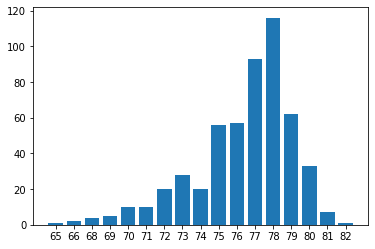

In [18]:
def plot_bins(data):
    plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
    plt.show()
    
plot_bins(bins)

In [23]:
nccts[heights.index(74)]

'2538003.nii'

## Get mask

In [25]:
def get_mask(ids, index, verbose = True, binary = True):
    assert len(ids) == len(index)
    assert len(ids) > 0
    faces = [nib.load(ncct_dir+ids[i]).get_fdata()[:,:,index[i]] for i in range(len(ids))]
    if binary:
        for f in faces: f[f > 0] = 1

    if verbose:
        _, axs = plt.subplots(1, len(ids)+1, figsize = (20,7))
        for i in range(len(ids)):
            axs[i].imshow(np.flip(faces[i].T, 0), cmap = "gray")
    mask = faces[0]
    for i in range(len(ids)-1):
        mask += faces[i]
    mask /= len(ids)
    negative = 1 - mask
    if verbose:
        axs[-1].imshow(np.flip(negative.T, 0), cmap = "gray")
    return mask

## Frog face

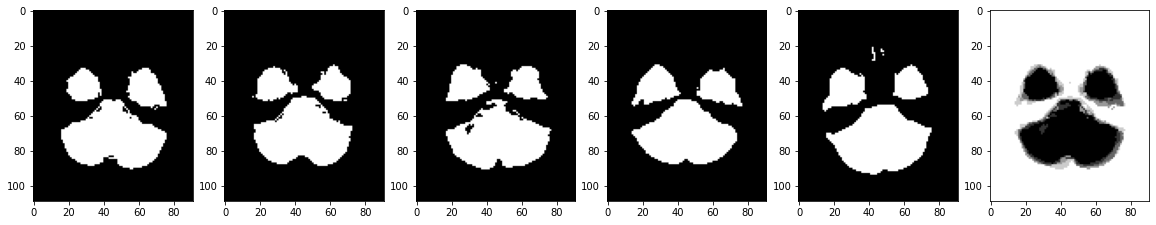

In [21]:
ids = ["2466554.nii", "2630659.nii", "1520491.nii", "2270965.nii", "2548328.nii"]
index = [17, 17, 17, 15, 14]
        
face = get_mask(ids, index, True)

## Insular slice

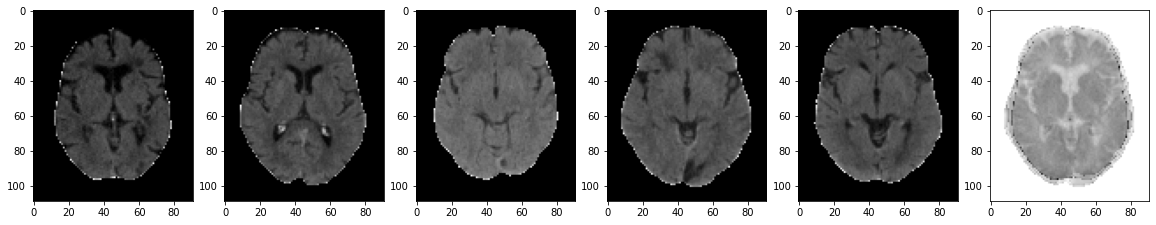

In [26]:
ids = ["120713.nii", "1303781.nii", "2520986.nii", "2605128.nii", "2503602.nii"]
index = [40, 39, 33, 34, 36]

mask = get_mask(ids, index, binary = False)

2503602.nii


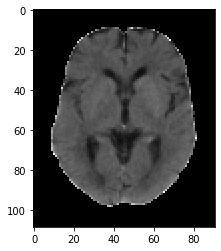


1534147.nii


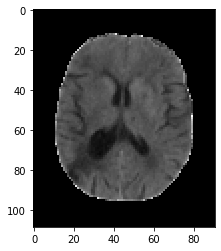


2623834.nii


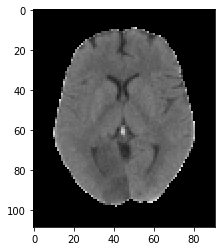


19614.nii


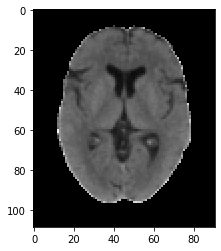


2510110.nii


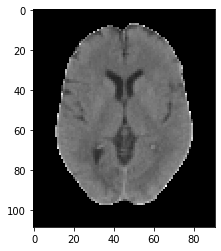


655771.nii


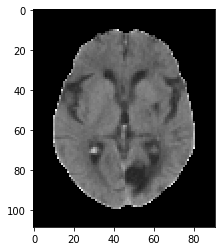


2619031.nii


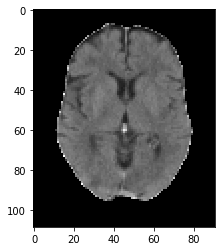


5.nii


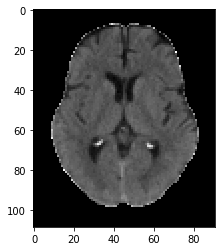


1848736.nii


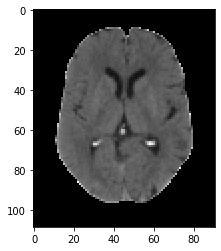


2636144.nii


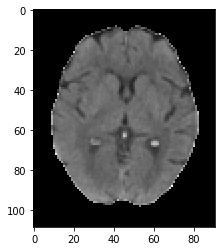


634673.nii


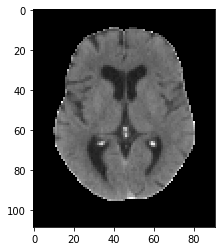


1589421.nii


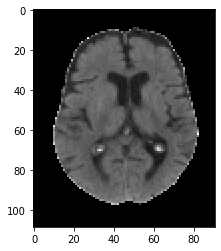


534379.nii


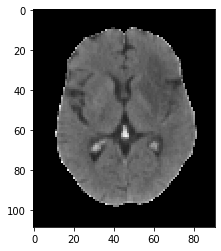


1952712.nii


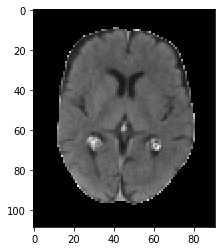


209855.nii


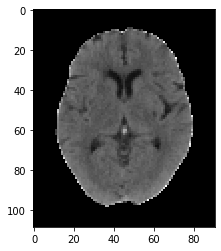


2542330.nii


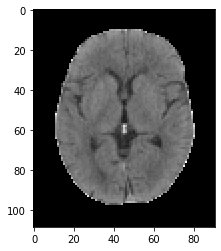


85180.nii


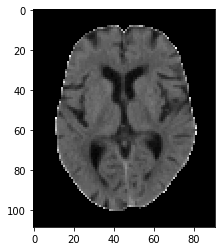


2460912.nii


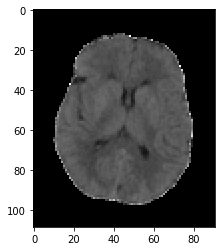


174595.nii


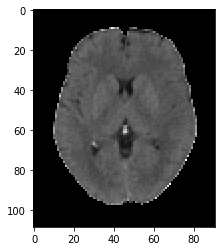


129393.nii


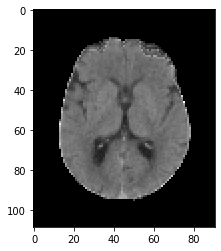


376386.nii


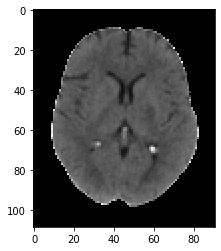


1914780.nii


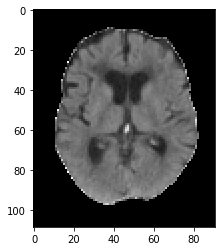


1322475.nii


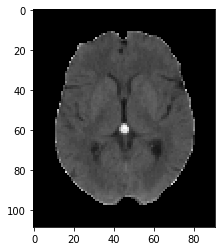


2427464.nii


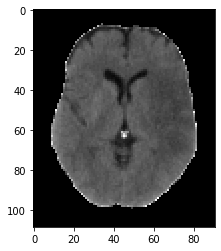


2232356.nii


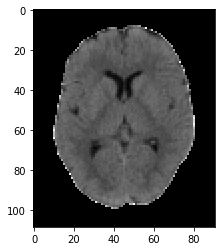


241551.nii


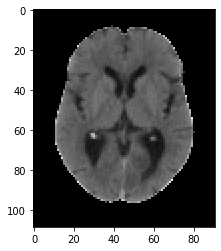


1308587.nii


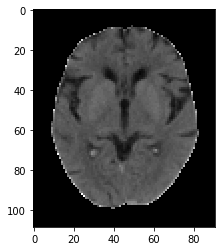


315255.nii


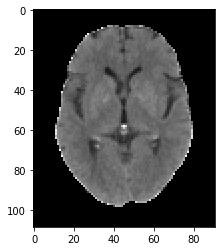


173677.nii


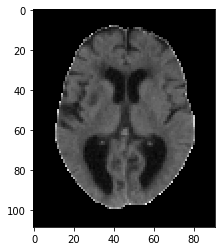


1630009.nii


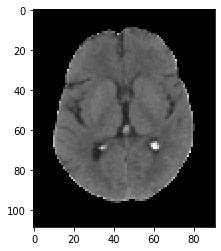


2148492.nii


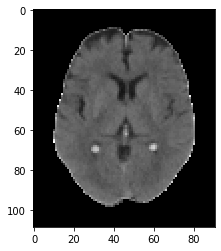


576130.nii


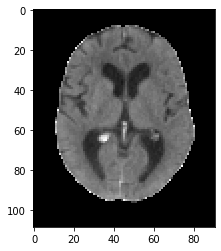


861925.nii


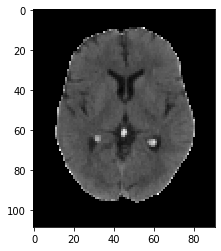


228489.nii


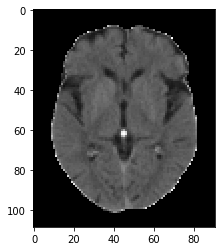


1370624.nii


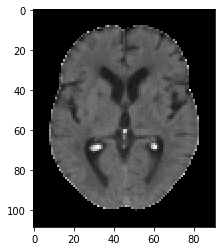


2637591.nii


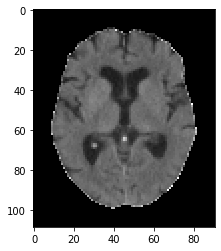


987792.nii


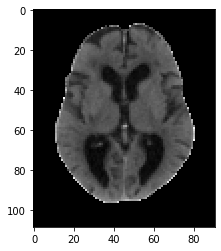


171131.nii


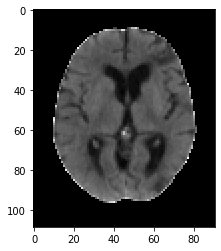


2207691.nii


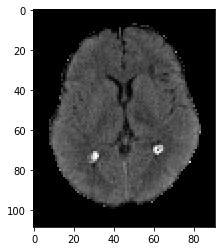


1954138.nii


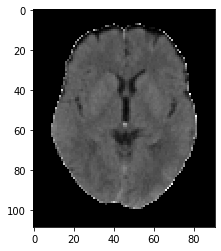


511615.nii


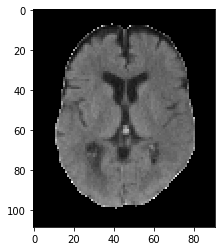


1117733.nii


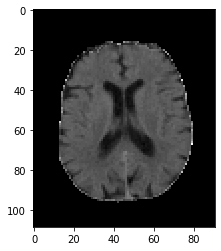


2520534.nii


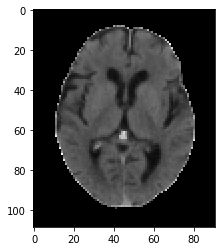


245319.nii


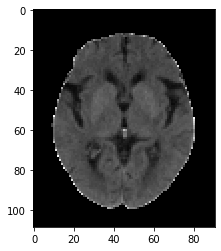


2517563.nii


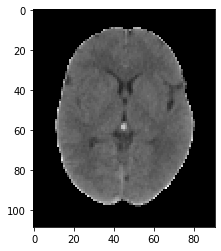


2058927.nii


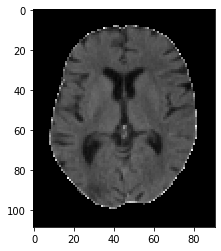


2473173.nii


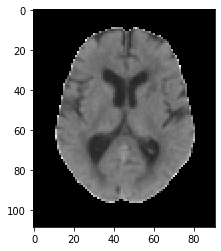


523872.nii


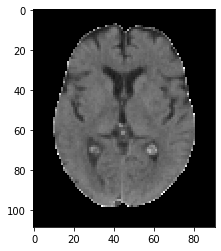


1003346.nii


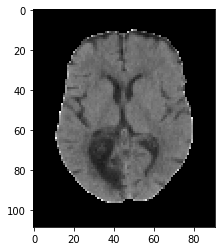


1419458.nii


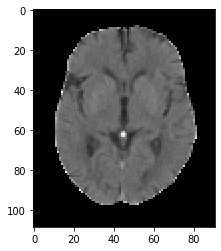


2164559.nii


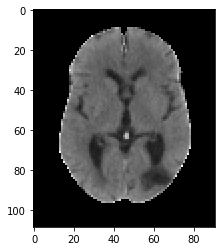


2466554.nii


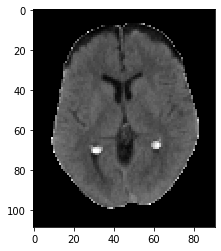


898660.nii


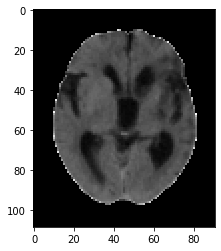


2676628.nii


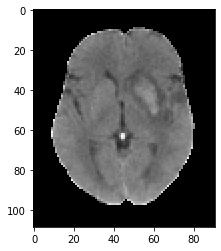


2232896.nii


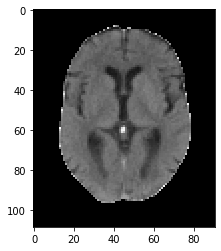


1544494.nii


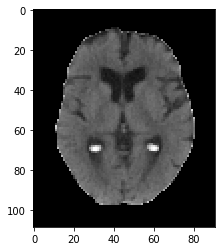


1734362.nii


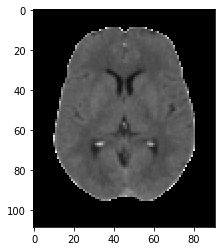


1856315.nii


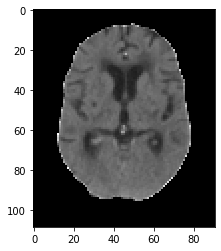


7.nii


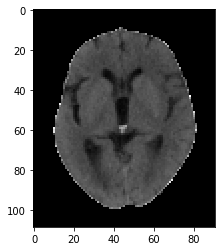


664044.nii


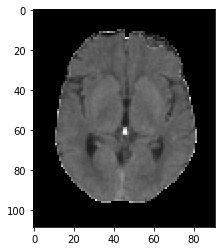


2537119.nii


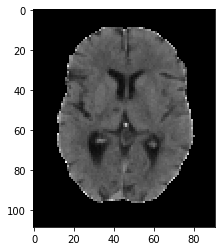


226767.nii


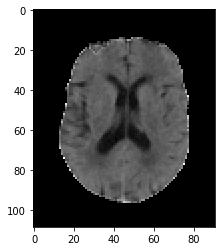


2524529.nii


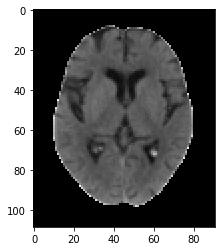


2593153.nii


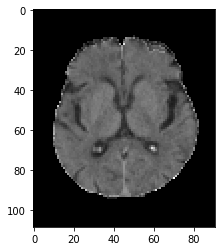


89200.nii


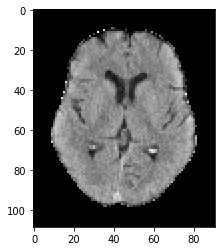


2644947.nii


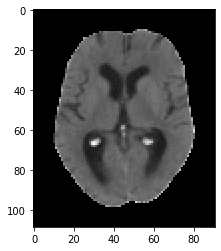


243629.nii


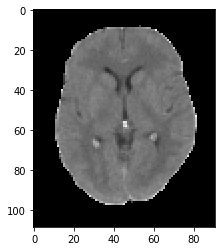


2270965.nii


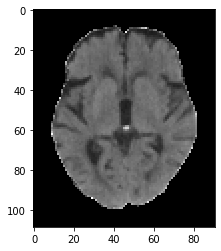


1777630.nii


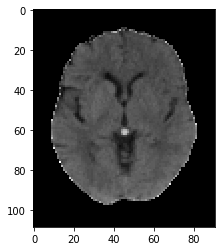


2557581.nii


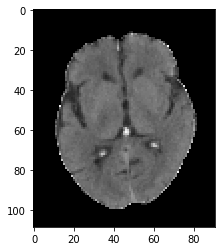


111443.nii


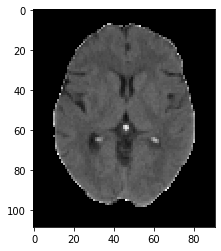


2670987.nii


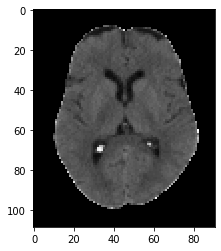


2641543.nii


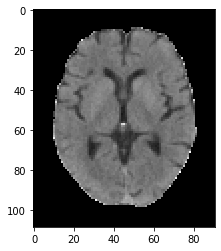


2626185.nii


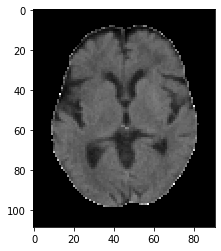


2587987.nii


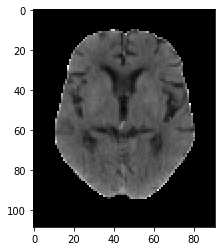


1210912.nii


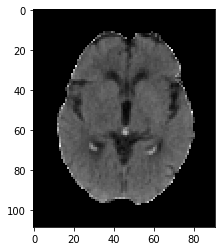


131026.nii


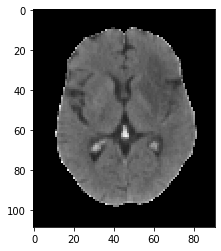


1923734.nii


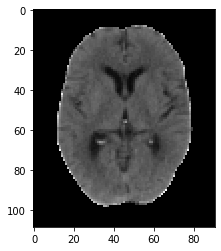


2542117.nii


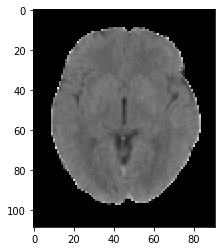


697055.nii


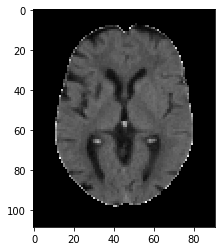


1056076.nii


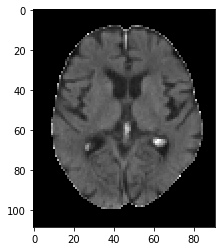


2593235.nii


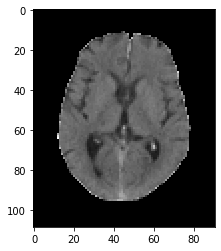


143017.nii


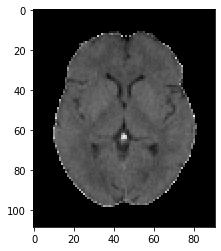

In [ ]:
def filter_slices(mask):
    negative = 1 - mask
    for ncct in nccts:
        scan = nib.load(ncct_dir+ncct).get_fdata()
        scores = []
        for i in range(img.shape[-1]):
            ax_slice = scan[:,:,i]
            ax_slice[ax_slice > 0] = 1
            score = (ax_slice*mask).sum() - (ax_slice*negative).sum()
            scores.append(score)
        i = np.argmax(scores)
        print(ncct)
        scan = nib.load(ncct_dir+ncct).get_fdata()
#         _, axs = plt.subplots(1, 5, figsize = (20,7))
#         for j in (-2,-1,0,1,2):
#             axs[j].imshow(np.flip(scan[:,:,i+j].T, 0), cmap = "gray")
        plt.imshow(np.flip(scan[:,:,i-2:i+2].mean(axis = 2).T), cmap = "gray")
        plt.show()
        input()
        
filter_slices(mask)

# Assert `RandomFlip` augmentation

In [13]:
not_flipped = []
for ncct in nccts:
    filename = ncct_dir+ncct
    normal = nib.load(filename).get_fdata()
    flipped = nib.load(filename.replace(".nii", "-RandomFlip.nii")).get_fdata()
    if (normal == flipped).all():
        not_flipped.append( filename.split("/")[-1].replace(".nii", "") )

In [14]:
not_flipped

[]

## Crazy idea - average all slices

(109, 91)


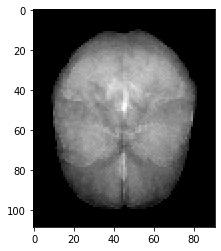


(109, 91)


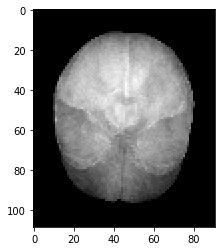


(109, 91)


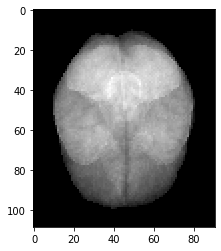


(109, 91)


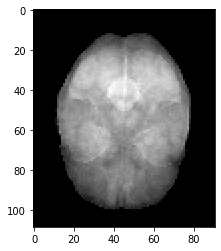


(109, 91)


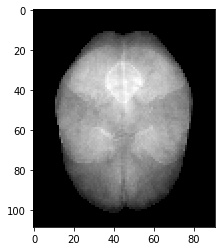


(109, 91)


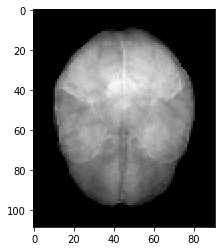


(109, 91)


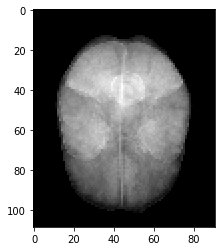


(109, 91)


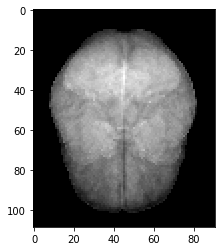


(109, 91)


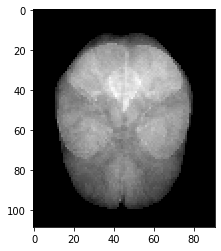


(109, 91)


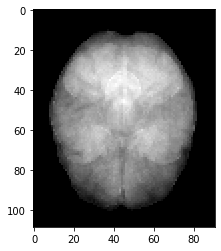


(109, 91)


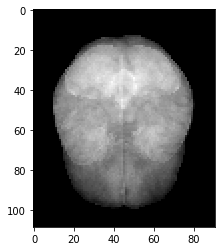


(109, 91)


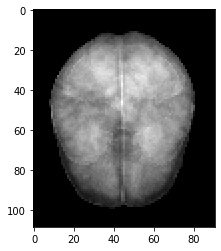


(109, 91)


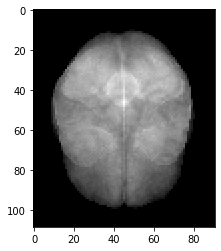


(109, 91)


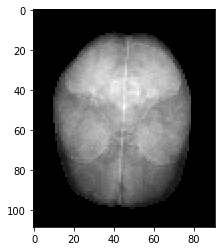


(109, 91)


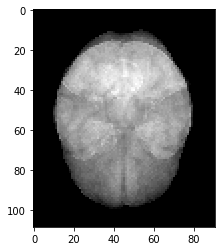


(109, 91)


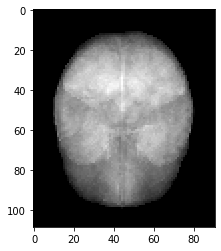


(109, 91)


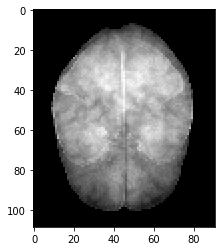


(109, 91)


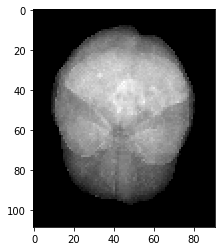


(109, 91)


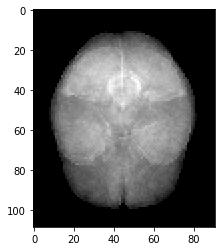


(109, 91)


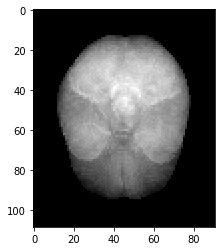


(109, 91)


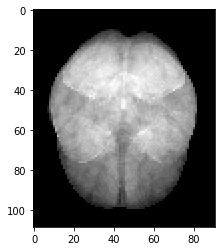


(109, 91)


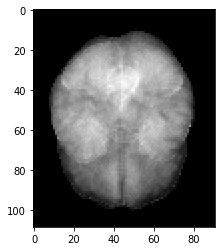


(109, 91)


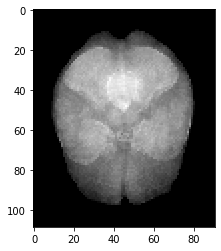


(109, 91)


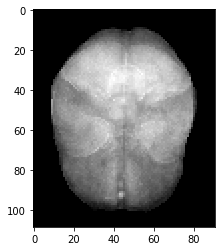


(109, 91)


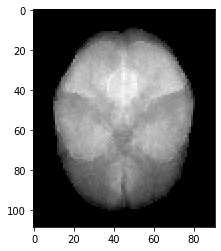


(109, 91)


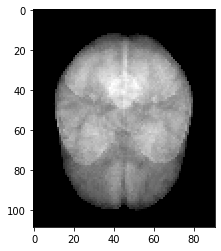


(109, 91)


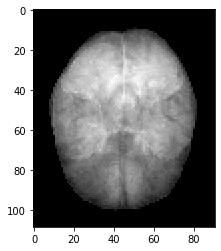


(109, 91)


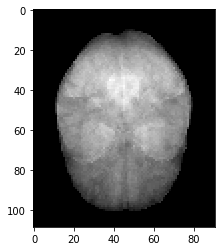


(109, 91)


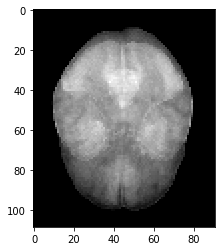


(109, 91)


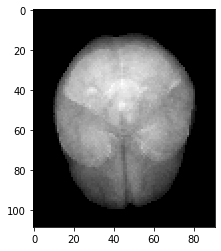


(109, 91)


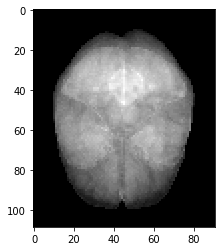


(109, 91)


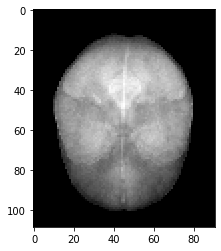


(109, 91)


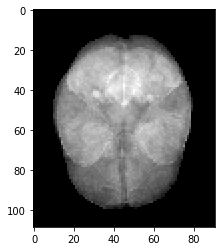


(109, 91)


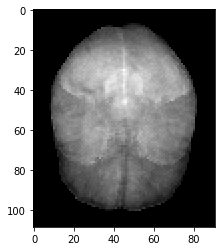


(109, 91)


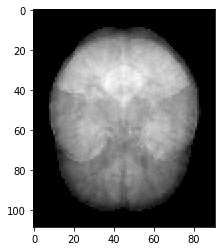


(109, 91)


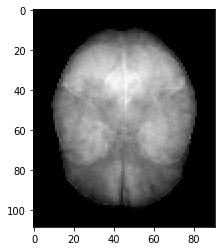


(109, 91)


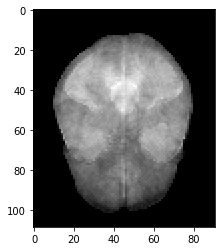


(109, 91)


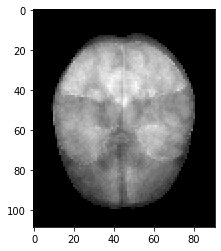


(109, 91)


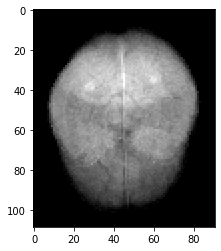


(109, 91)


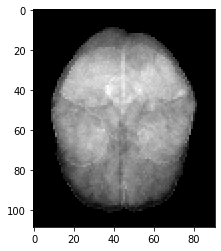


(109, 91)


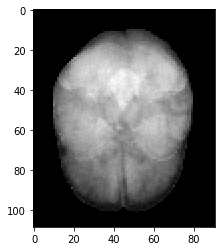


(109, 91)


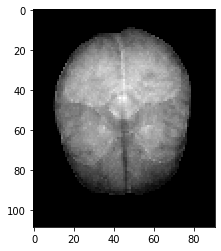


(109, 91)


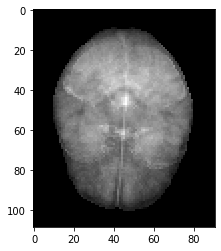


(109, 91)


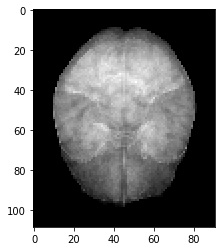


(109, 91)


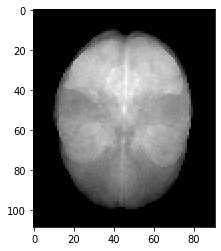


(109, 91)


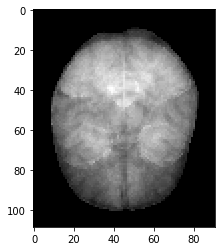


(109, 91)


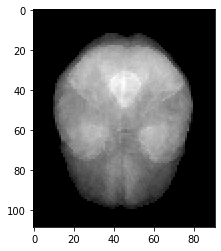


(109, 91)


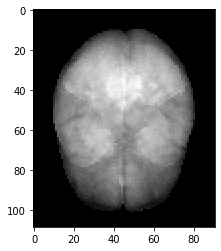


(109, 91)


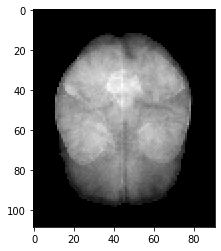


(109, 91)


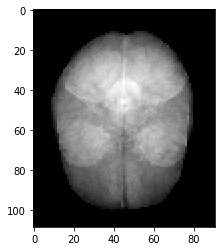


(109, 91)


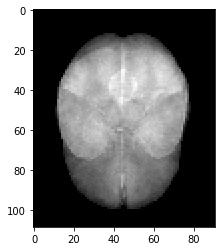


(109, 91)


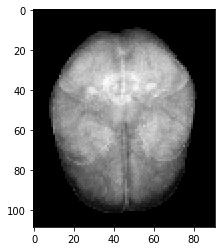


(109, 91)


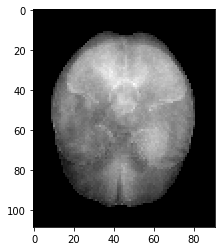


(109, 91)


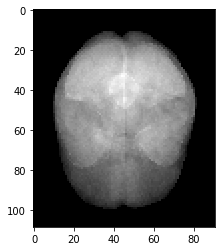


(109, 91)


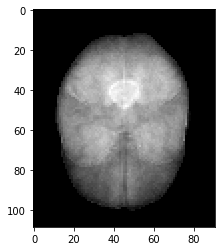


(109, 91)


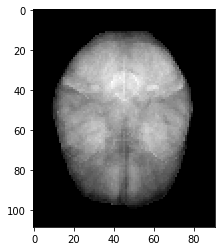


(109, 91)


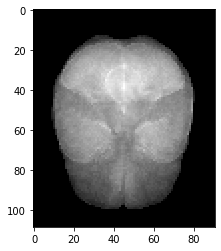


(109, 91)


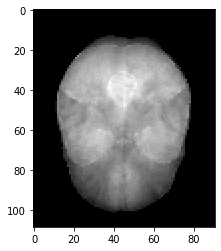


(109, 91)


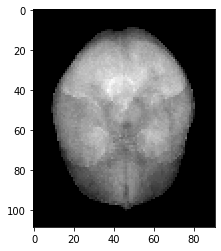


(109, 91)


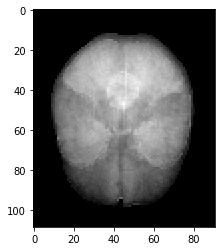


(109, 91)


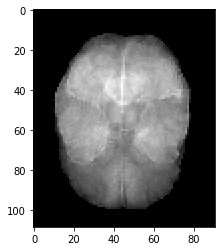


(109, 91)


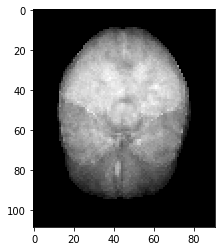


(109, 91)


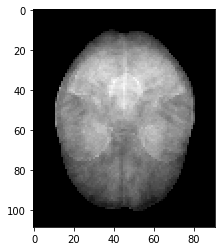


(109, 91)


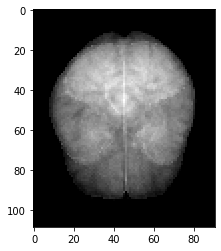


(109, 91)


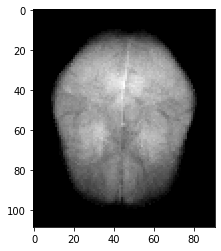


(109, 91)


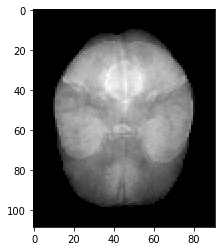


(109, 91)


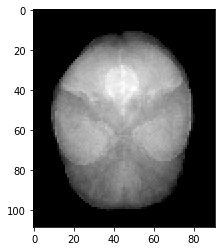


(109, 91)


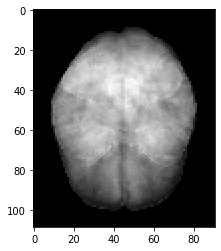


(109, 91)


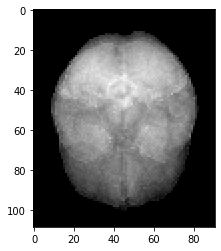


(109, 91)


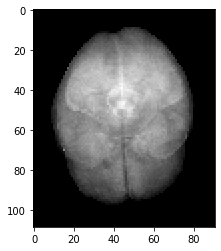


(109, 91)


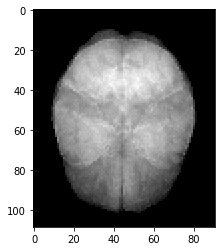


(109, 91)


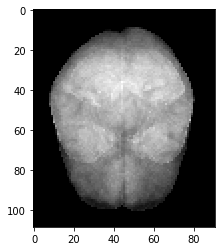


(109, 91)


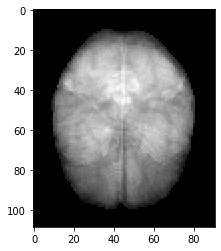

KeyboardInterrupt: Interrupted by user

In [36]:
for ncct in nccts:
    scan = nib.load(ncct_dir+ncct).get_fdata()
    i = 0
    while np.count_nonzero(scan[:,:,i] > 0) < 100:
        i += 1
    start = i
    while (i < scan.shape[-1]) and (np.count_nonzero(scan[:,:,i] > 0) > 100):
        i += 1
    end = i
    img = scan[:,:,start:end].mean(axis = 2).T
    print(img.shape)
#     img = np.flip(img, 0)
    plt.imshow(img, cmap = "gray")
    plt.show()
    input()
    plt.close()